# Qwen2-VL

In this notebook we will use the vision language model [Qwen/Qwen2-VL-7B-Instruct](https://huggingface.co/Qwen/Qwen2-VL-7B-Instruct) to inspect an image.

We will use [ScaDS.AI LLM infrastructure](https://llm.scads.ai/) infrastructure at the [Center for Information Services and High Performance Computing (ZIH) of TU Dresden](https://tu-dresden.de/zih). To use it, you must be connected via [TU Dresden VPN](https://tu-dresden.de/zih/dienste/service-katalog/arbeitsumgebung/zugang_datennetz/vpn).

In [1]:
import openai
from skimage.io import imread
import stackview
from image_utilities import numpy_to_bytestream
import base64
from stackview._image_widget import _img_to_rgb
import os
from IPython.display import display, Markdown

## Example image
First we load a microscopy image. With such an example we can test if the model was trained on scientific microscopy data.

[[[ 3  6  1]
  [ 3  7  0]
  [ 3  6  1]
  ...
  [11  8  2]
  [11  7  2]
  [11 11  2]]

 [[ 3  6  1]
  [ 3  8  1]
  [ 3  7  1]
  ...
  [11 10  2]
  [10 10  2]
  [11 11  2]]

 [[ 4  6  1]
  [ 3  6  1]
  [ 4  6  1]
  ...
  [10 10  2]
  [11 10  2]
  [11 10  2]]

 ...

 [[15 14  8]
  [14 14  8]
  [15 14  7]
  ...
  [10 11  5]
  [10 12  4]
  [11 14  5]]

 [[14 16  7]
  [16 15  7]
  [15 16  8]
  ...
  [10 11  4]
  [11 13  4]
  [11 16  5]]

 [[15 18  7]
  [14 17  8]
  [14 17  8]
  ...
  [ 9 12  5]
  [10 13  5]
  [11 15  5]]]
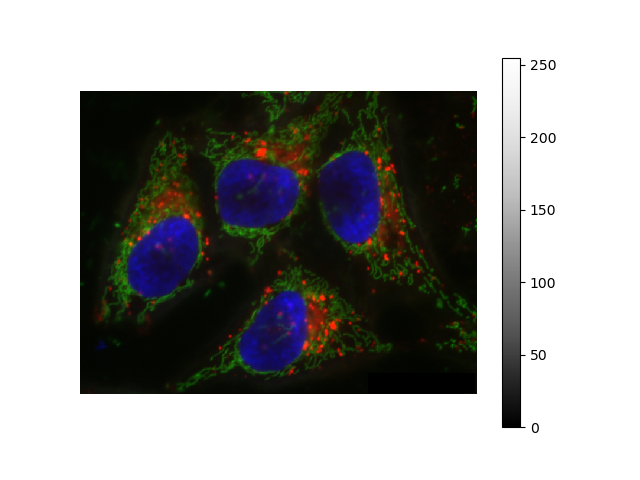
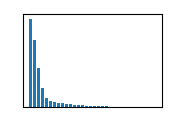

In [2]:
hela_cells = imread("data/hela-cells-8bit.tif")
stackview.insight(hela_cells)

We will now send the image to the LLM server and ask it the some questions.

In [3]:
from image_utilities import prompt_scads_llm

In [4]:
res = prompt_scads_llm("what's in this image?", hela_cells)

display(Markdown(res))

This image appears to be a microscopic view of cells, likely taken using fluorescence microscopy. The cells are stained with different colors to highlight specific structures or proteins. 

- The blue areas represent the nuclei of the cells, stained with a dye like DAPI or Hoechst.
- The green areas likely represent the actin filaments, which are a part of the cell's cytoskeleton.
- The red areas could represent another protein or structure within the cells, possibly stained with a different dye.

This type of imaging is commonly used in biological research to study cell structure and function.

## Exercise
Ask the model to specifically describe what is in a selected colour channel. Repeat this exercise with a natural image such as "real_cat.png".